In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath='IBM_DATA/Telco_customer_churn.xlsx'
data=pd.read_excel(filepath)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [92]:
#remove from Payment Method column the brackets [DATA CLEANING]

import re

data['Payment Method']=data["Payment Method"].apply(lambda values: re.sub(r"\([^()]*\)","",values))
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer,103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer,21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card,103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [93]:
#check from few sample data

#using scikit learn
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)
train_set

#using numpy
np.random.seed(42)
sample_indexes=np.random.permutation(len(data))
val_length=int(len(data)*0.01)
sample_indexes=sample_indexes[:val_length]
sample_data=data.iloc[sample_indexes]
sample_data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
185,2189-WWOEW,1,United States,California,Keene,93531,"35.214982, -118.59049",35.214982,-118.590490,Female,...,Month-to-month,Yes,Bank transfer,85.90,1269.55,Yes,1,96,3579,Don't know
2715,2446-ZKVAF,1,United States,California,Stockton,95207,"38.002125, -121.324979",38.002125,-121.324979,Male,...,Month-to-month,No,Credit card,56.80,1074.65,No,0,59,5558,NaN
3825,4986-MXSFP,1,United States,California,San Leandro,94579,"37.687264, -122.15728",37.687264,-122.157280,Female,...,Month-to-month,Yes,Mailed check,20.00,40.9,No,0,39,2237,NaN
1807,5868-YWPDW,1,United States,California,Sherman Oaks,91423,"34.146957, -118.432138",34.146957,-118.432138,Male,...,Month-to-month,Yes,Electronic check,84.20,519.15,Yes,1,72,5834,Limited range of services
132,9412-GHEEC,1,United States,California,Murrieta,92563,"33.581045, -117.14719",33.581045,-117.147190,Male,...,Month-to-month,No,Bank transfer,104.80,4131.95,Yes,1,88,3492,Service dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,2434-EEVDB,1,United States,California,California City,93505,"35.151491, -117.927597",35.151491,-117.927597,Female,...,Two year,Yes,Credit card,94.60,5948.7,No,0,26,5038,NaN
1375,1527-SXDPN,1,United States,California,Imperial Beach,91932,"32.579134, -117.119009",32.579134,-117.119009,Male,...,Two year,Yes,Bank transfer,96.25,4990.25,Yes,1,97,4751,Poor expertise of phone support
2533,5898-IGSLP,1,United States,California,Mountain View,94041,"37.388349, -122.075299",37.388349,-122.075299,Male,...,Month-to-month,No,Electronic check,89.30,2823,No,0,46,2132,NaN
3914,3572-UOLYZ,1,United States,California,San Jose,95118,"37.255479, -121.889838",37.255479,-121.889838,Female,...,Month-to-month,Yes,Bank transfer,84.80,3958.85,No,0,39,5756,NaN


Text(0.5, 1.0, 'Churn Rate by Tenure, Phone Customers')

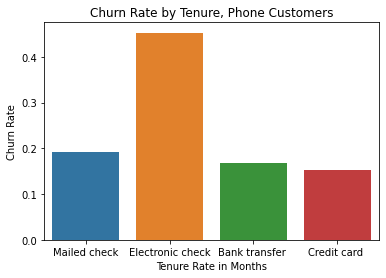

In [94]:
sns.barplot(y='Churn Value',x='Payment Method',data=data,ci=None)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Rate in Months')
plt.title('Churn Rate by Tenure, Phone Customers')

In [95]:
#get column names only

data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Text(0.5, 1.0, 'Churn Rate by Tenure, Phone Customers')

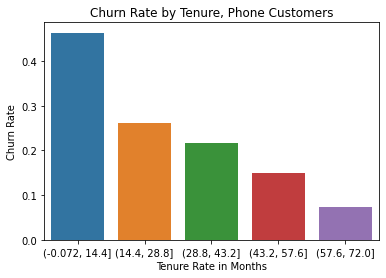

In [96]:
#churn value this time by tenure

sns.barplot(y='Churn Value',x=pd.cut(data['Tenure Months'],bins=5)
,data=data,ci=None)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Rate in Months')
plt.title('Churn Rate by Tenure, Phone Customers')

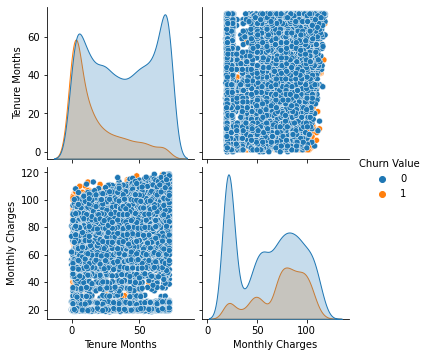

In [103]:
#seaborn plot correlation

pairplot=data[['Tenure Months',
               'Total Charges',
               'Monthly Charges',
               'Churn Value'
              ]]

sns.pairplot(pairplot,hue='Churn Value')

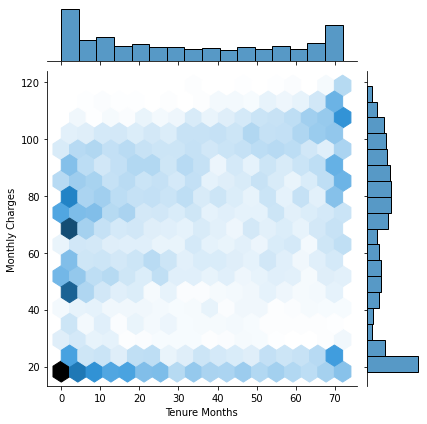

In [105]:
#seaborn hexbin

sns.jointplot(x=data['Tenure Months'],y=data['Monthly Charges'],kind='hex')